In [ ]:
#
#Trabajo 2	– Preparación	de	texto,	representación	de	características	y	representación	de	documentos.
# 
# Erica Yubiana Herrera Sepulveda
# Juan Camilo Gómez Betancur
# Natalia Andrea Gaviria Angulo 
# 
# Universidad EAFIT 
# 2021-2
# 
# librerías en nltk, spacy, scikit-learn o gensim y 2) en pyspark, diferentes opciones de representación de características como one-bit, TF,TF-IDF, word2vec, doc2vec.


In [ ]:
#configuración en google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# cargar las librerias necesarias
## 1. nltk para 'procesamiento natural del lenguaje'
# Natural language toolkit (NLTK) es la biblioteca más popular para el procesamiento del lenguaje natural (NLP) usada para construir programas para análisis de texto
## 2. pandas para procesamiento de dataframes, muy usado en preparación de datos
# Pandas es un paquete de Python que proporciona estructuras de datos similares a los dataframes de R, muy utilizada sobre todo dentro del ámbito de Data Science y Machine Learning
## 3. re - expresiones regulares
## 4. numpy, codecs, etc - otraas
# 5. Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python

In [ ]:
#Instalacion de nltk y de pyspark
!pip install nltk
!pip install pyspark

     |████████████████████████████████| 212.4 MB 63 kB/s 
     |████████████████████████████████| 198 kB 46.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=cd4d3277fede0c7baa3534d04c01e837bc77f25a53e2fb3bb7d6bb2e3cb2c2c6
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
#Se realiza la importacion de las dependencias a utilizar
#El	proyecto	lo	deberá	realizar	con: Python y	(nltk,	scikit	y/o	gensim) y PySpark,	con	Spark y	las	diferentes	librerías	de	nlp
import nltk
import gensim
import spacy
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt
from os import listdir,chdir

In [ ]:
# directorios (path) de entrada y salida:
# Para saber donde estan mis datos de entrada, donde los voy a procesar y donde los voy a sacar, donde path_in es la ruta de donde se encuentran los datos de entrada
# path_out corresponde a la ruta de los datos de salida, filenametxt en este coloco el nombre del archivo el cual voy a procesar 
#Remoción	 de	 caracteres	 especiales	 y	 tokens	 que	 considere	 irrelevantes	 para	 una	consulta.
#
path_in="gdrive/MyDrive/st1800_20212/datasets/papers_sample_pdf/"




In [ ]:
archivo = !ls "gdrive/MyDrive/st1800_20212/datasets/papers_sample_pdf" | grep ".txt"


In [ ]:
archivo 

['0704.3504.txt',
 '0706.1402.txt',
 '0710.0736.txt',
 '0803.2570.txt',
 '0808.0084.txt',
 '0811.1254.txt',
 '0811.2853.txt',
 '0812.2709.txt']

In [ ]:
# leer un archivo de ejemplo en .txt
# input_file = open(path_in+filenametxt, "r", encoding='iso-8859-1')
archivos = []
for t in archivo:
  archivos.append(open(path_in+t,"r").read())
print(archivos)



['Smooth Rényi Entropy of Ergodic Quantum\nInformation Sources\nBerry Schoenmakers\n\nJilles Tjoelker\n\narXiv:0704.3504v1 [quant-ph] 26 Apr 2007\n\nDept. of Mathematics and Computer Science\nTechnical University Eindhoven\nThe Netherlands\nberry@win.tue.nl\n\nj.tjoelker@student.tue.nl\n\nPim Tuyls\n\nEvgeny Verbitskiy\n\nInformation Security Systems\nPhilips Research Eindhoven\nThe Netherlands\n\nDigital Signal Processing\nPhilips Research Eindhoven\nThe Netherlands\n\npim.tuyls@philips.com\n\nevgeny.verbitskiy@philips.com\n\nAbstract— We investigate the recently introduced notion of\nsmooth Rényi entropy for the case of ergodic information sources,\nthereby generalizing previous work which concentrated mainly\non i.i.d. information sources. We will actually consider ergodic\nquantum information sources, of which ergodic classical information sources are a special case. We prove that the average\nsmooth Rényi entropy rate will approach the entropy rate of a\nstationary, ergodic sou

In [ ]:
# corpus de nltk para 'tokenizer' , 'stopwords' y wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Toquenización .split()
tokens_split = []
for t in archivos:
    tokens_split.extend(t.split())
print(len(tokens_split))

95118


In [ ]:
# Toquenización .spacy()
nlp = spacy.load("en_core_web_sm")

tokens_spacy = []
for t in archivos:
    tokens_spacy.extend(nlp(t))
print(len(tokens_spacy))

130637


In [ ]:
# Toquenización gensim()

tokens_gensim = []
for t in archivos:
    tokens_gensim.extend(gensim.utils.simple_tokenize(t))
print(len(tokens_gensim))


84413


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

In [ ]:
# stopwords en nltk
# stopwords del ingles
 
stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

179
{'their', 'him', 'on', 'll', "won't", 'were', 'hasn', 'do', 'after', "she's", 'nor', "you'd", 'them', "shouldn't", 'wasn', 'don', 'above', 'most', 'down', 'all', 'who', "needn't", 'same', 'than', 'aren', 'through', "shan't", 'is', 'below', 'only', 'so', 'shan', 'they', "wasn't", 'herself', 'some', 'no', 'a', 'doesn', 'once', "weren't", "isn't", "wouldn't", 'here', 'during', 'doing', "didn't", 'are', 'his', 'weren', 'yourself', "that'll", 'each', 'had', 'ain', 'themselves', 'an', 'theirs', 'against', 'for', 'until', "hasn't", 'the', 'himself', 'mightn', 'your', 'have', 'm', 'these', 'to', 'our', "you'll", 'that', 'will', 's', 'he', 'be', 'if', 'when', 'just', 'very', 'being', 'such', 'needn', 'up', "don't", 'why', 're', 'by', "aren't", 'having', 'what', 'did', 'wouldn', "you're", 'couldn', 'before', 'should', 'about', 'hers', 'her', "it's", 'was', 'from', 'further', 'y', 'you', 'or', "mightn't", 'and', 'hadn', 'ours', 'into', 'ma', 'shouldn', 'whom', 'not', 'it', 'out', 'between', "

120130
numero de palabras finales =  8575
[(',', 6712), ('.', 5007), (')', 4588), ('(', 4552), ('the', 3934), ('of', 2667), ('and', 1686), ('is', 1476), ('a', 1398), ('=', 1377), ('1', 1313), ('to', 1212), ('[', 1200), (']', 1194), ('in', 1077), ('for', 959), ('that', 877), ('n', 869), ('−', 819), ('i', 652)]


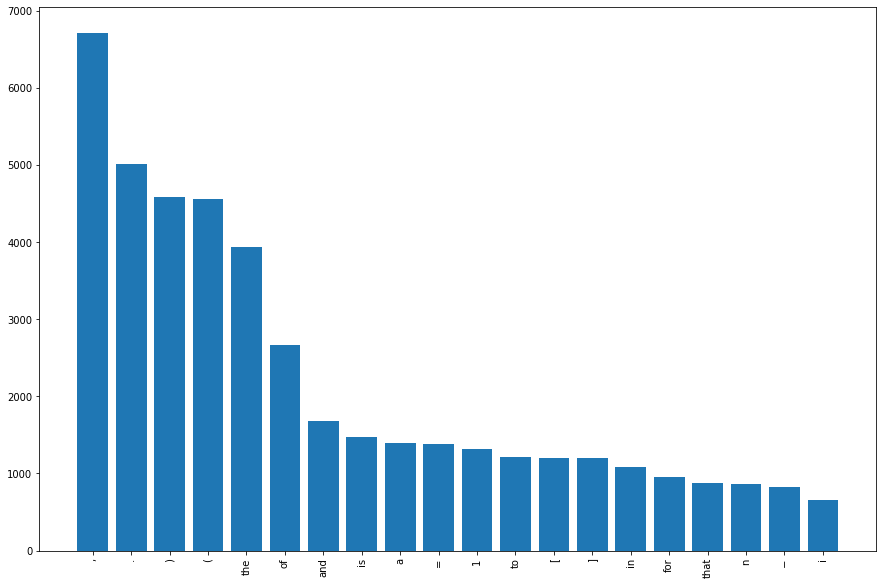

In [ ]:
# Histogrma Tokens NLTK

tokens =[]
for t in archivos:
    tokens.extend(nltk.word_tokenize(t))

print(len(tokens))
fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  7217
[('', 32594), ('the', 3935), ('of', 2668), ('and', 1687), ('1', 1634), ('is', 1476), ('a', 1404), ('to', 1212), ('in', 1077), ('n', 1039), ('for', 959), ('that', 877), ('i', 877), ('2', 732), ('M', 725), ('with', 629), ('we', 628), ('0', 554), ('k', 531), ('X', 526)]


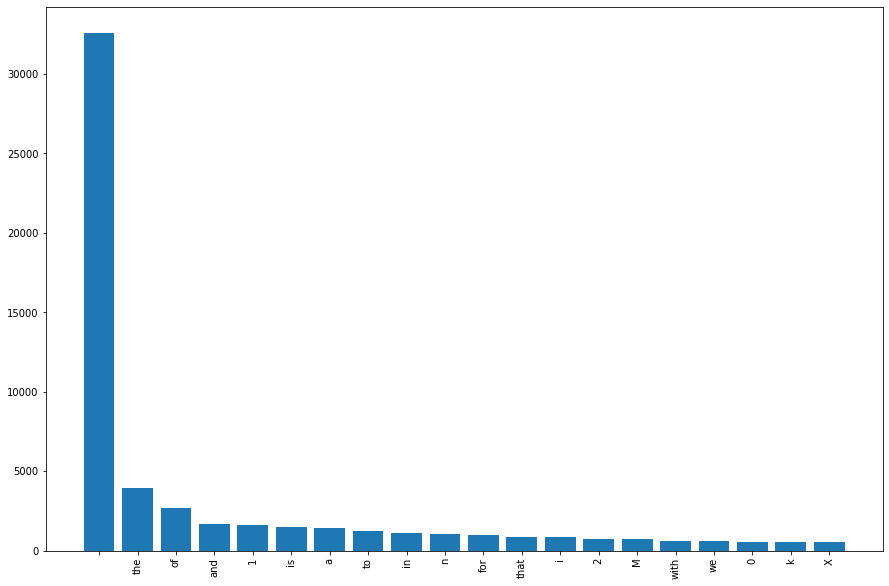

In [ ]:
#eliminar caracteres especiales
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  6278
[('the', 4386), ('of', 2669), ('and', 1695), ('is', 1478), ('in', 1355), ('to', 1241), ('for', 1158), ('we', 892), ('that', 887), ('with', 642), ('this', 536), ('by', 522), ('as', 510), ('on', 457), ('be', 443), ('are', 381), ('an', 338), ('code', 293), ('probability', 292), ('error', 288)]


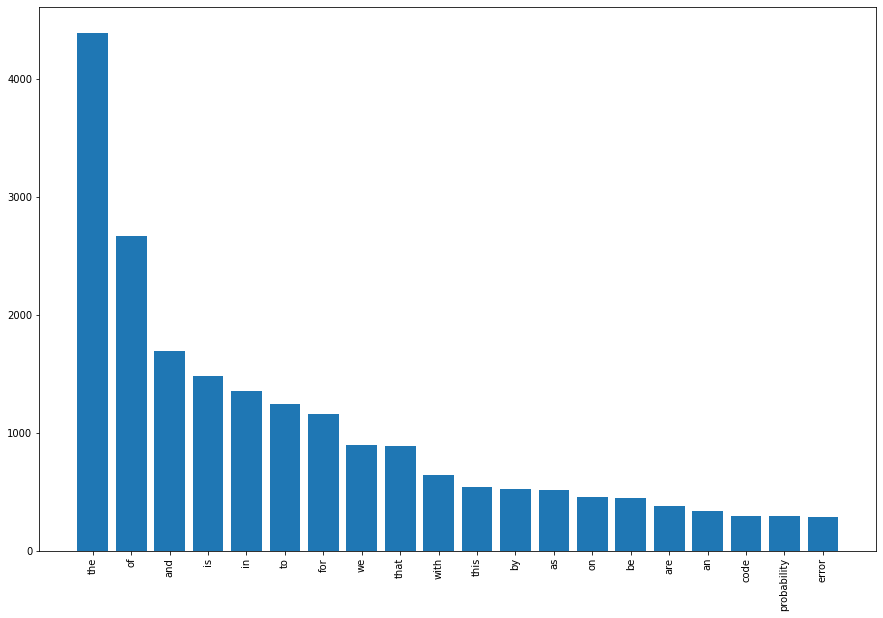

In [ ]:
#llevar a minusculas
tokens = [w.lower() for w in tokens if len(w)>1]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
##remover StopWords spacy
sp = spacy.load('en_core_web_sm')

all_stopwords = sp.Defaults.stop_words

tokens_stopwords_spacy= [w for w in tokens if not w in all_stopwords]
print(len(tokens_stopwords_spacy))
print(tokens_stopwords_spacy)

41841
['smooth', 'renyi', 'entropy', 'ergodic', 'quantum', 'information', 'sources', 'berry', 'schoenmakers', 'jilles', 'tjoelker', 'arxiv07043504v1', 'quantph', '26', 'apr', '2007', 'dept', 'mathematics', 'computer', 'science', 'technical', 'university', 'eindhoven', 'netherlands', 'berry', 'wintuenl', 'jtjoelker', 'studenttuenl', 'pim', 'tuyls', 'evgeny', 'verbitskiy', 'information', 'security', 'systems', 'philips', 'research', 'eindhoven', 'netherlands', 'digital', 'signal', 'processing', 'philips', 'research', 'eindhoven', 'netherlands', 'pimtuyls', 'philipscom', 'evgenyverbitskiy', 'philipscom', 'abstract', 'investigate', 'recently', 'introduced', 'notion', 'smooth', 'renyi', 'entropy', 'case', 'ergodic', 'information', 'sources', 'generalizing', 'previous', 'work', 'concentrated', 'mainly', 'iid', 'information', 'sources', 'actually', 'consider', 'ergodic', 'quantum', 'information', 'sources', 'ergodic', 'classical', 'information', 'sources', 'special', 'case', 'prove', 'average

In [ ]:
##remover StopWords gensim
from gensim.parsing.preprocessing import STOPWORDS

all_stopwords_gensim = STOPWORDS
sw_list = {"not"}
all_stopwords_gensim = STOPWORDS.difference(sw_list)

tokens_stopwords_gensim = [w for w in tokens if not w in all_stopwords_gensim]

print(len(tokens_stopwords_gensim))
print(tokens_stopwords_gensim)

41750
['smooth', 'renyi', 'entropy', 'ergodic', 'quantum', 'information', 'sources', 'berry', 'schoenmakers', 'jilles', 'tjoelker', 'arxiv07043504v1', 'quantph', '26', 'apr', '2007', 'dept', 'mathematics', 'science', 'technical', 'university', 'eindhoven', 'netherlands', 'berry', 'wintuenl', 'jtjoelker', 'studenttuenl', 'pim', 'tuyls', 'evgeny', 'verbitskiy', 'information', 'security', 'systems', 'philips', 'research', 'eindhoven', 'netherlands', 'digital', 'signal', 'processing', 'philips', 'research', 'eindhoven', 'netherlands', 'pimtuyls', 'philipscom', 'evgenyverbitskiy', 'philipscom', 'abstract', 'investigate', 'recently', 'introduced', 'notion', 'smooth', 'renyi', 'entropy', 'case', 'ergodic', 'information', 'sources', 'generalizing', 'previous', 'work', 'concentrated', 'mainly', 'iid', 'information', 'sources', 'actually', 'consider', 'ergodic', 'quantum', 'information', 'sources', 'ergodic', 'classical', 'information', 'sources', 'special', 'case', 'prove', 'average', 'smooth',

numero de palabras finales =  6167
[('code', 293), ('probability', 292), ('error', 288), ('codes', 258), ('pr', 241), ('m1', 229), ('message', 220), ('theorem', 190), ('ln', 189), ('using', 185), ('let', 181), ('time', 181), ('special', 177), ('theory', 177), ('gt', 176), ('length', 168), ('12', 164), ('lemma', 163), ('set', 162), ('n1', 155)]


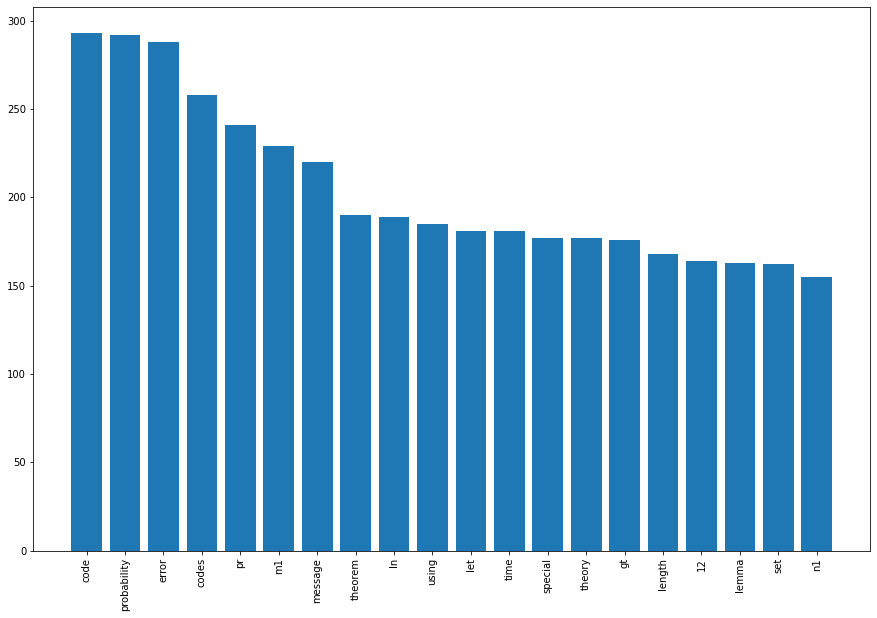

In [ ]:
#remover StopWords nltk
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  5730
[('code', 551), ('message', 334), ('error', 323), ('probability', 321), ('pr', 241), ('m1', 229), ('time', 217), ('theorem', 199), ('design', 192), ('ln', 189), ('graph', 189), ('set', 187), ('using', 185), ('let', 182), ('theory', 178), ('special', 177), ('lemma', 177), ('gt', 176), ('bound', 175), ('length', 170)]


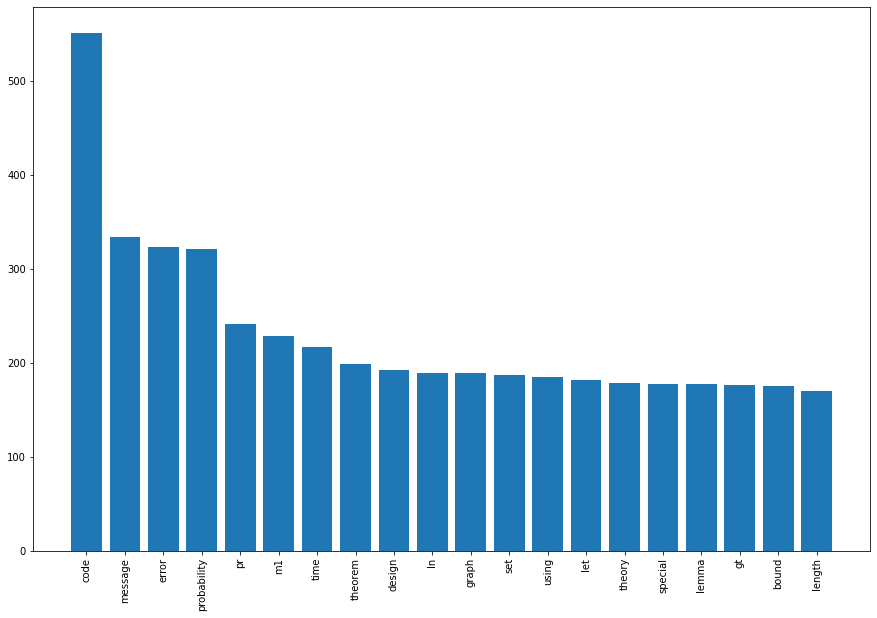

In [ ]:
#lematizar
wordnet_lemmatizer = WordNetLemmatizer()

tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]


fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  5730
[('code', 551), ('message', 334), ('error', 323), ('probability', 321), ('pr', 241), ('m1', 229), ('time', 217), ('theorem', 199), ('design', 192), ('ln', 189), ('graph', 189), ('set', 187), ('using', 185), ('let', 182), ('theory', 178), ('special', 177), ('lemma', 177), ('gt', 176), ('bound', 175), ('length', 170)]


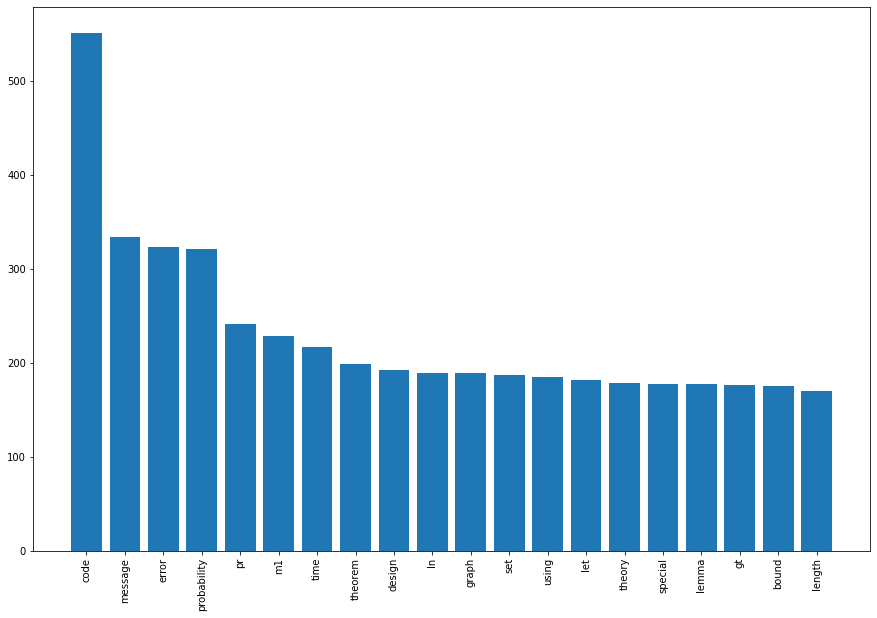

In [ ]:
#stemming
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("spanish")

tokens =[]
for t in archivos:
    tokens.extend(nltk.word_tokenize(t))
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w not in stop_words_nltk]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]
tokens_clear = [snowball.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#ngrams
from nltk import ngrams
T_grams = list(ngrams(tokens_clear,3))  
B_grams = list(ngrams(tokens_clear,2))  
T_grams[100:110]

[('sourc', 'von', 'neumann'),
 ('von', 'neumann', 'entropy'),
 ('neumann', 'entropy', 'rat'),
 ('entropy', 'rat', 'quantum'),
 ('rat', 'quantum', 'sourc'),
 ('quantum', 'sourc', 'ntroduction'),
 ('sourc', 'ntroduction', 'elegant'),
 ('ntroduction', 'elegant', 'notion'),
 ('elegant', 'notion', 'smooth'),
 ('notion', 'smooth', 'renyi')]

In [ ]:
## Punto 2

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(list(zip(archivo,archivos)), columns = ['archivo','contenido'])
print(df)

         archivo                                          contenido
0  0704.3504.txt  Smooth Rényi Entropy of Ergodic Quantum\nInfo...
1  0706.1402.txt  Analyzing Design Process and Experiments on th...
2  0710.0736.txt  1\n\nColour Image Segmentation by the\nVector-...
3  0803.2570.txt  1\n\nUnequal Error Protection:\nAn Information...
4  0808.0084.txt  On the hitting times of quantum versus random ...
5  0811.1254.txt  arXiv:0811.1254v1 [math.CO] 8 Nov 2008\n\nChap...
6  0811.2853.txt  Generating Random Networks Without Short Cycle...
7  0812.2709.txt  1\n\nVariations on a theme by Schalkwijk and K...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['contenido'].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.toarray())



['00', '000', '0010117', '003', '0044', '0045', '007', '0084v1', '01', '0156', '015848', '02', '025', '027', '03', '0301043', '0309430', '04', '0403263', '042312', '05', '0512258', '052307', '06', '0608426', '0610143', '0610143v2', '0610146', '0610146v2', '07', '0704', '0710', '0736v1', '08', '0803', '0808', '0811', '0812', '09', '0i', '0ih0', '0kwα', '10', '100', '101', '1010001', '1016', '102', '103', '104', '105', '106', '10623', '107', '108', '1085', '109', '1095', '1099', '11', '110', '1101000', '1108', '111', '1117', '112', '1123', '113', '114', '115', '116', '117', '117543', '118', '119', '12', '120', '1201', '121', '1212', '1216698', '122', '1229', '123', '123000', '1234', '1238', '124', '1245', '1248', '125', '1254v1', '126', '1261', '1267', '1268', '1269', '127', '1271766600', '1273', '128', '1288', '129', '12s0', '13', '130', '1302', '131', '132', '133', '134', '1343', '135', '1359', '136', '1365', '137', '138', '1382', '139', '1391', '1393', '1397', '14', '140', '141', '141

In [ ]:
data_df = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
data_df.index = archivo
print (data_df)

               00  000  0010117  003  0044  0045  ...  ψik2  ω2  ωi  ωm2  ℓ2  ℓn
0704.3504.txt   0    0        0    0     0     0  ...     0   0   0    0   0   0
0706.1402.txt   0    0        0    0     0     0  ...     0   0   0    0   0   0
0710.0736.txt   2    0        0    0     2     0  ...     0   0   3    0   0   0
0803.2570.txt   0    0        0    0     0     0  ...     0   0   0    0   0  16
0808.0084.txt   0    0        1    1     0     0  ...     1   0   0    0   0   0
0811.1254.txt   1    1        0    0     0     0  ...     0   1   0    1   0   0
0811.2853.txt   4    3        0    0     0     1  ...     0   0   0    0   0   0
0812.2709.txt   0    0        0    0     0     0  ...     0   0   0    0   1   0

[8 rows x 6069 columns]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['contenido'].tolist()
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.toarray())

['00', '000', '0010117', '003', '0044', '0045', '007', '0084v1', '01', '0156', '015848', '02', '025', '027', '03', '0301043', '0309430', '04', '0403263', '042312', '05', '0512258', '052307', '06', '0608426', '0610143', '0610143v2', '0610146', '0610146v2', '07', '0704', '0710', '0736v1', '08', '0803', '0808', '0811', '0812', '09', '0i', '0ih0', '0kwα', '10', '100', '101', '1010001', '1016', '102', '103', '104', '105', '106', '10623', '107', '108', '1085', '109', '1095', '1099', '11', '110', '1101000', '1108', '111', '1117', '112', '1123', '113', '114', '115', '116', '117', '117543', '118', '119', '12', '120', '1201', '121', '1212', '1216698', '122', '1229', '123', '123000', '1234', '1238', '124', '1245', '1248', '125', '1254v1', '126', '1261', '1267', '1268', '1269', '127', '1271766600', '1273', '128', '1288', '129', '12s0', '13', '130', '1302', '131', '132', '133', '134', '1343', '135', '1359', '136', '1365', '137', '138', '1382', '139', '1391', '1393', '1397', '14', '140', '141', '141

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['contenido'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.toarray())

['00', '000', '0010117', '003', '0044', '0045', '007', '0084v1', '01', '0156', '015848', '02', '025', '027', '03', '0301043', '0309430', '04', '0403263', '042312', '05', '0512258', '052307', '06', '0608426', '0610143', '0610143v2', '0610146', '0610146v2', '07', '0704', '0710', '0736v1', '08', '0803', '0808', '0811', '0812', '09', '0i', '0ih0', '0kwα', '10', '100', '101', '1010001', '1016', '102', '103', '104', '105', '106', '10623', '107', '108', '1085', '109', '1095', '1099', '11', '110', '1101000', '1108', '111', '1117', '112', '1123', '113', '114', '115', '116', '117', '117543', '118', '119', '12', '120', '1201', '121', '1212', '1216698', '122', '1229', '123', '123000', '1234', '1238', '124', '1245', '1248', '125', '1254v1', '126', '1261', '1267', '1268', '1269', '127', '1271766600', '1273', '128', '1288', '129', '12s0', '13', '130', '1302', '131', '132', '133', '134', '1343', '135', '1359', '136', '1365', '137', '138', '1382', '139', '1391', '1393', '1397', '14', '140', '141', '141